# Projet UTA : Explorer la musique à travers les émotions

## Introduction

Pour les besoins de ce projet, nous avons utilisé des ensembles de données issus de **Kaggle**. Nous avons trouvé et combiné plusieurs ensembles de données contenant des informations brutes ventilées par **année, éléments de musique, genre, artiste et région**. La richesse des informations contenues dans ces jeux de données nous a permis de **raconter une histoire** et d'**explorer les liens entre la musique et les émotions humaines**.

## Objectif du projet

À première vue, des paramètres comme la **dansabilité**, l’**énergie** ou encore la **popularité** semblent être de simples données froides et abstraites. Pourtant, derrière ces chiffres se cachent des **comportements, des ressentis et des émotions profondément humains**.

Notre objectif est d’**aller au-delà des apparences** et d’utiliser ces informations pour mieux comprendre la **relation entre la musique et les personnes qui l’écoutent**.

## UTA : Une application qui transcende l’expérience musicale

Dans le cadre de ce projet, nous avons développé **UTA**, une application dont le nom est inspiré du personnage de *One Piece*, **Uta**, qui cherche à **transcender les auditeurs à travers sa musique**.

À travers **UTA**, nous voulons dépasser les simples recommandations algorithmiques et proposer une **expérience musicale réellement adaptée aux émotions des utilisateurs**.

L’objectif est de faire en sorte que **chaque morceau sélectionné résonne avec ce qu’ils ressentent à l’instant présent**, en exploitant les **données de Spotify** pour créer une **immersion musicale encore plus forte**.

## Comprendre l’humain derrière les données

Avec **UTA**, nous cherchons à **comprendre l’humain derrière les données** et à démontrer que **la musique, bien plus qu’une simple suite de notes et de rythmes, est un véritable langage des émotions**.

## Les données utilisées

Les données utilisées dans ce projet proviennent de **cinq ensembles de données** qui nous permettent d’**analyser et de visualiser individuellement** les informations de Spotify en fonction des **genres, des artistes et des années**.

Cette approche nous aide à mieux comprendre **les tendances des différentes caractéristiques musicales** en fonction de ces **hyperparamètres**.


In [44]:
import numpy as np
import pandas as pd

import plotly.express as px
import warnings

warnings.filterwarnings("ignore")


# Chargement des nouvelles données, source (https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset)

In [45]:
data = pd.read_csv('data/data.csv')
genre_data = pd.read_csv('data/data_by_genres.csv')
artist_data = pd.read_csv('data/data_by_artist.csv')
year_data = pd.read_csv('data/data_by_year.csv')
genre_data_2 = pd.read_csv('data/data_w_genres.csv')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [47]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [48]:
artist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [49]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [50]:
genre_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

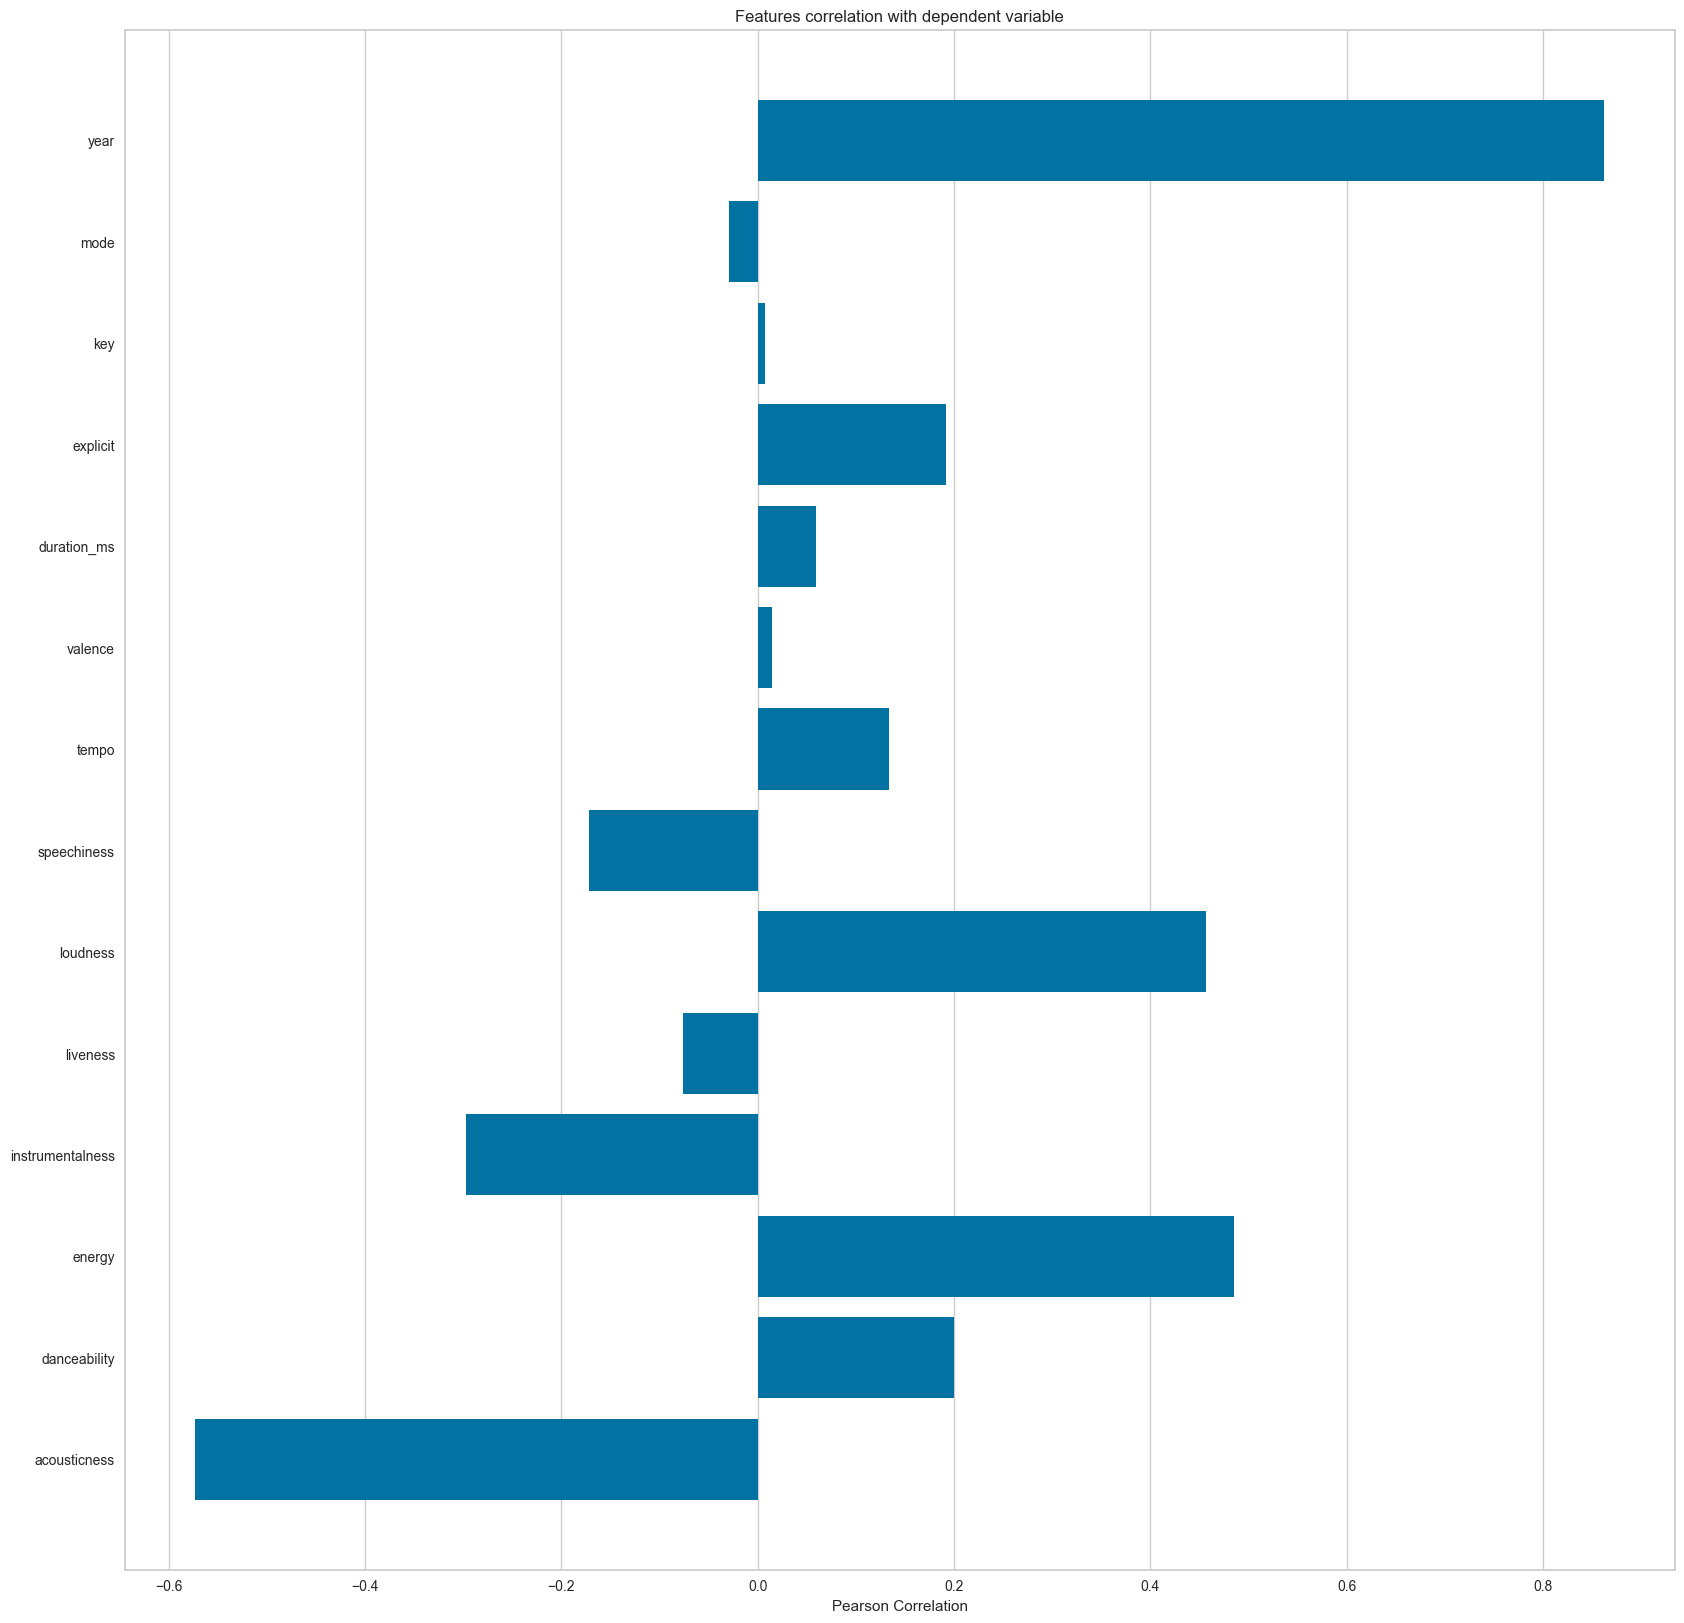

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [51]:
from matplotlib import pyplot as plt
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'explicit', 'key', 'mode',
                 'year']

X, y = data[feature_names], data['popularity']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize'] = (20, 20)
visualizer.fit(X, y)
visualizer.show()

Nous définissons ici nos features (acousticness, danceability, etc.) afin de calculer, avec Yellowbrick, la corrélation entre chaque feature et la popularité des morceaux.


L’axe horizontal représente la force de la corrélation (entre -1 et 1).\
Une corrélation positive signifie que l’augmentation de la feature est associée à une augmentation de la popularité.\
Une corrélation proche de ZÉRO indic que la feature à peu ou pas d’impact sur la popularité.\
Une corrélation négative signifie que plus la feature est présente, moins le morceau à de chances d’être populaire.\
L’axe horizontal représente la force de la corrélation (entre -1 et 1).

Analyse des résultats\
L’année (year) est fortement corrélée à la popularité ➝ Les morceaux récents sont plus populaires.\
Les morceaux plus forts (loudness) et énergiques (energy) sont généralement plus appréciés.\
Les morceaux trop parlés (speechiness) (ex. podcasts, morceaux très lyriques) sont moins populaires.\
Les morceaux très acoustiques (acousticness) ou instrumentaux (instrumentalness) ont tendance à être moins populaires.\
Interprétation\
🔹 Les morceaux récents, énergiques et forts sont plus populaires → Ce qui correspond aux tendances des hits actuels.\
🔹 Les morceaux trop acoustiques ou instrumentaux sont moins populaires → Car la musique populaire d’aujourd’hui est souvent plus produite et orientée vers un son plus énergique.\
🔹 La danceability joue un rôle, mais ce n’est pas un facteur déterminant → La popularité dépend également d’autres éléments comme le marketing, les playlists et l’exposition médiatique.

In [52]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

1. La baisse de l'acousticness** (bleu foncé)**
La musique était très acoustique jusqu'aux années 1960-1970, puis on observe une forte diminution.
Cela correspond à l'essor de l'électronique, du rock amplifié, et des synthétiseurs dans la production musicale.
Depuis les années 2000, le niveau reste relativement bas.
👉 Interprétation : Le passage des instruments traditionnels vers des productions plus électroniques et digitales.

2. L'augmentation de l'energy** (vert) et de la danceability (rouge)**
L'énergie musicale a augmenté progressivement depuis les années 1950.
La danceability suit une tendance similaire, particulièrement après les années 2000.
Cela peut être lié à l’essor des musiques électroniques, pop et hip-hop, qui favorisent des rythmes plus entraînants.
👉 Interprétation : Les musiques modernes sont plus énergiques et plus dansantes, ce qui correspond à une demande plus forte pour des musiques adaptées aux clubs, festivals et plateformes de streaming.

3. La chute de l'instrumentalness** (violet)**
On remarque que les morceaux instrumentaux étaient beaucoup plus fréquents avant 1950.
Depuis, cette caractéristique diminue, ce qui peut être dû à l’augmentation de la musique populaire chantée et à la domination des morceaux avec paroles.
On voit cependant une légère augmentation vers 2010, ce qui pourrait correspondre à l’essor des genres comme le lo-fi, l’ambient, et la musique instrumentale en streaming.
👉 Interprétation : La musique moderne met davantage l'accent sur les voix et les paroles.

4. Stabilité de la liveness (orange)
La liveness (présence d’un enregistrement live) est restée relativement stable.
Peu d'évolution notable, ce qui signifie que la majorité des productions sont studio-based, avec peu d'enregistrements en direct.
👉 Interprétation : L'industrie musicale est toujours très axée sur les productions en studio.

5. La courbe de la valence (cyan)
La valence (positivité de la musique) était plus élevée avant les années 1950, puis a légèrement chuté.
Elle reste assez stable mais semble remonter après 2010.
Cela pourrait indiquer une tendance vers des musiques plus "sombres" et émotionnelles, en lien avec l'évolution des thèmes abordés dans les paroles et les styles musicaux dominants (rap, pop mélancolique).
👉 Interprétation : La musique est devenue plus émotionnelle et parfois plus sombre au fil du temps.

In [53]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

## Objectif de l'Analyse
Nous avons sélectionné les **10 genres musicaux les plus populaires** et analysé plusieurs de leurs caractéristiques musicales :
- **`valence`** → Niveau d'émotion positive (joie, bonheur).
- **`energy`** → Intensité et excitation d'un morceau.
- **`danceability`** → Potentiel dansant d'un morceau.
- **`acousticness`** → Degré d'acoustique (opposé à électronique).

Nous avons visualisé ces données sous forme de **graphique en barres groupées**, où chaque barre représente une caractéristique musicale pour un genre donné.


## Résultats et Observations

### **1. Les genres les plus énergiques (`energy` élevé)**
- **`circuit`** et **`guaracha`** ont les niveaux d’**énergie** les plus élevés.
- Ces genres sont souvent **très rythmés et festifs**, ce qui explique cette caractéristique.

### **2. Les genres les plus dansants (`danceability` élevé)**
- **`trap venezolano`**, **`basshall`** et **`guaracha`** sont les plus dansants.
- À l’inverse, **`alberta hip hop`** semble légèrement moins adapté à la danse.

### **3. Les genres les plus acoustiques (`acousticness` élevé)**
- **`afroswing`** et **`afro soul`** affichent des niveaux **d’acousticness** plus élevés.
- **`circuit`** et **`guaracha`** ont des valeurs presque nulles, indiquant une prédominance **électronique**.

### **4. Les genres les plus joyeux (`valence` élevé)**
- **`afro soul`** et **`afroswing`** sont les genres les plus **positifs émotionnellement**.
- Les autres genres varient selon leur nature (ex : le **trap** est souvent plus sombre).


## **Pourquoi ces résultats ?**
- **Genres électroniques (`circuit`, `guaracha`)** → Très **énergiques**, peu **acoustiques**, parfaits pour les clubs.
- **Genres urbains (`trap venezolano`, `hip hop`)** → Bonne **danceability**, mais énergie et valence varient selon les sous-genres.
- **Genres afro (`afro soul`, `afroswing`)** → Plus **acoustiques** et souvent **associés à des émotions positives**.

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Création du pipeline de clustering sans n_jobs
cluster_pipeline = Pipeline([
	('scaler', StandardScaler()),
	('kmeans', KMeans(n_clusters=10, n_init=10))  # Remplace n_jobs par n_init
])

# Sélection des colonnes numériques
X = genre_data.select_dtypes(np.number)

# Entraînement du pipeline
cluster_pipeline.fit(X)

# Ajout des prédictions de cluster
genre_data['cluster'] = cluster_pipeline.predict(X)


Ce code effectue un clustering des genres musicaux en utilisant l'algorithme K-Means.

Normalisation des données : Avant d’appliquer le clustering, les valeurs numériques sont mises à l’échelle pour éviter qu’une feature comme la durée d’un morceau n’ait trop d’impact par rapport à des variables comme l’énergie ou la dansabilité.

Application de K-Means : L’algorithme divise les genres en 10 clusters basés sur leurs caractéristiques musicales. Il est entraîné avec plusieurs initialisations pour garantir un bon résultat.

Assignation des clusters : Une fois le modèle entraîné, chaque genre est associé à un cluster spécifique, permettant de détecter des similarités entre différents styles musicaux.

On fait ca pour :

Identifier des groupes de genres ayant des propriétés musicales proches.
Mieux comprendre les tendances musicales.
Explorer comment différents genres se regroupent naturellement en fonction de leurs caractéristiques.

In [55]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 🚀 Étape 1 : Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X doit être un DataFrame contenant uniquement des valeurs numériques

# 🚀 Étape 2 : Réduction de dimension avec PCA
# Trouver automatiquement le meilleur nombre de composantes
pca = PCA().fit(X_scaled)
cum_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_n = np.argmax(cum_variance >= 0.95) + 1  # On garde 95% de la variance

# Appliquer PCA avec ce nombre optimal de composantes
pca = PCA(n_components=optimal_n)
X_pca = pca.fit_transform(X_scaled)

# 🚀 Étape 3 : Application de t-SNE
tsne = TSNE(n_components=2, perplexity=10, learning_rate=200, n_iter=2000, random_state=42, verbose=1)
genre_embedding = tsne.fit_transform(X_pca)

# 🚀 Étape 4 : Création du DataFrame pour la visualisation
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']  # Associe les genres aux points t-SNE
projection['cluster'] = genre_data['cluster']  # Associe les clusters KMeans

# 🚀 Étape 5 : Visualisation avec Plotly
fig = px.scatter(
	projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'],
	title="Visualisation t-SNE des genres musicaux"
)
fig.show()


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.002s...
[t-SNE] Computed neighbors for 2973 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.565623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.095085
[t-SNE] KL divergence after 2000 iterations: 1.352378


Normalisation des données → Les valeurs sont mises à l’échelle pour éviter que certaines caractéristiques aient trop d’influence sur la suite de l’analyse.

Réduction de dimension avec PCA → L’algorithme PCA est utilisé pour compresser les données tout en conservant 95% de l’information. Cela permet de réduire le nombre de variables tout en minimisant la perte d’information.

Application de t-SNE → Une seconde réduction de dimension est appliquée, cette fois avec t-SNE, qui permet de projeter les données en 2D pour les visualiser tout en préservant au mieux les relations entre genres.

Création d’un DataFrame pour la visualisation → Chaque point de la projection est associé à son genre musical et au cluster déterminé par K-Means.

Visualisation avec Plotly → Un graphique interactif est généré où chaque point représente un genre musical, coloré en fonction de son cluster. Cela permet d’observer comment les genres se regroupent et quelles sont leurs similitudes.

On fait ca pour :

Identifier les groupes de genres similaires.
Observer si les clusters formés par K-Means correspondent aux tendances naturelles des données.
Comprendre les relations entre les genres musicaux en un coup d'œil.

In [56]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os

os.environ["SPOTIFY_CLIENT_ID"] = ""
os.environ["SPOTIFY_CLIENT_SECRET"] = ""

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.environ["SPOTIFY_CLIENT_ID"],
                                                           client_secret=os.environ["SPOTIFY_CLIENT_SECRET"]))


def find_song(name, year):
	song_data = defaultdict()
	results = sp.search(q='track: {} year: {}'.format(name, year), limit=1)
	if not results['tracks']['items']:
		return None

	results = results['tracks']['items'][0]
	track_id = results['id']
	audio_features = sp.audio_features(track_id)[0]

	song_data['name'] = [name]
	song_data['year'] = [year]
	song_data['explicit'] = [int(results['explicit'])]
	song_data['duration_ms'] = [results['duration_ms']]
	song_data['popularity'] = [results['popularity']]

	for key, value in audio_features.items():
		song_data[key] = value

	return pd.DataFrame(song_data)



SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

Authentification avec l'API Spotify
Les identifiants Client ID et Client Secret sont stockés dans des variables d'environnement pour s’authentifier auprès de Spotify.
L’objet SpotifyClientCredentials est utilisé pour se connecter à l’API en mode lecture seule (sans besoin d’authentification utilisateur).
Fonction find_song(name, year)
Cette fonction permet de retrouver une chanson et d’en extraire des données audio et des métadonnées.

🔹 Recherche de la chanson
On effectue une recherche avec sp.search(), en précisant le nom du morceau et l’année.
Si aucun résultat n’est trouvé, la fonction retourne None.\
🔹 Extraction des informations
Si un morceau est trouvé, on récupère :

ID Spotify (track_id) → Identifiant unique du morceau.
Données générales :
Nom, année, durée (duration_ms), popularité, et si le morceau est explicite (explicit).
Caractéristiques audio (audio_features) :
Spotify fournit des données analytiques sur la chanson (ex : énergie, danceability, tempo, loudness, valence, etc.).
Ces valeurs sont récupérées et stockées sous forme de DataFrame pandas pour une analyse plus facile.
Retour de la fonction
La fonction retourne un DataFrame contenant toutes ces informations.
Cela permet d'analyser un morceau spécifique et de l'intégrer à un dataset plus large si besoin.
Pourquoi utiliser cette approche ?
Accéder aux données de Spotify directement à partir d’un script.
Analyser les caractéristiques d’un morceau sans télécharger de fichiers audio.
Utiliser ces données pour du machine learning, comme la prédiction de popularité ou le clustering de morceaux.

In [30]:
from collections import defaultdict
from scipy.spatial.distance import cdist

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):
	try:
		song_data = spotify_data[(spotify_data['name'] == song['name'])
		                         & (spotify_data['year'] == song['year'])].iloc[0]
		return song_data

	except IndexError:
		return find_song(song['name'], song['year'])


def get_mean_vector(song_list, spotify_data):
	song_vectors = []

	for song in song_list:
		song_data = get_song_data(song, spotify_data)
		if song_data is None:
			print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
			continue
		song_vector = song_data[number_cols].values
		song_vectors.append(song_vector)

	song_matrix = np.array(list(song_vectors))
	return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
	flattened_dict = defaultdict()
	for key in dict_list[0].keys():
		flattened_dict[key] = []

	for dictionary in dict_list:
		for key, value in dictionary.items():
			flattened_dict[key].append(value)

	return flattened_dict


def recommend_songs(song_list, spotify_data, n_songs=10):
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    
    # Create and fit the scaler here instead of using undefined cluster_pipeline
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

 Définition des colonnes utilisées
 number_cols contient les caractéristiques audio et métadonnées numériques des morceaux (valence, danceability, tempo, popularity, etc.).
Ce sont ces valeurs qui seront comparées pour déterminer la similarité entre les chansons.

Fonction get_song_data(song, spotify_data)
🔹 Objectif → Retrouver les données d’une chanson dans le dataset spotify_data.

On cherche une correspondance exacte entre le nom du morceau et l’année.
Si la chanson n’est pas trouvée dans spotify_data, elle est récupérée en appelant find_song(), qui utilise l'API Spotify pour chercher les infos manquantes.
Si la chanson n’existe ni dans spotify_data ni sur Spotify, la fonction retourne None.
Fonction get_mean_vector(song_list, spotify_data)
🔹 Objectif → Calculer un vecteur moyen représentant l’ensemble des chansons de la liste.

Pour chaque chanson de song_list, on récupère son vecteur de caractéristiques audio (number_cols).
On calcule ensuite la moyenne de tous ces vecteurs pour obtenir un point central qui représente l’essence des morceaux donnés.
 Cette approche permet de recommander des morceaux proches de l’ensemble des chansons données, plutôt que d’en comparer une seule.

 Fonction flatten_dict_list(dict_list)
🔹 Objectif → Transformer une liste de dictionnaires en un dictionnaire unique regroupant les valeurs par clé.

Permet de manipuler plus facilement les informations des morceaux de song_list.
 Fonction recommend_songs(song_list, spotify_data, n_songs=10)
🔹 Objectif → Trouver les 10 chansons les plus similaires à la liste de morceaux donnée.

Comment ça fonctionne ?

On récupère les métadonnées des morceaux donnés (song_dict)
On calcule le vecteur moyen (song_center) → On cherche un point central qui représente la liste des chansons données.
On normalise les données (StandardScaler) → Cela permet d’éviter que certaines caractéristiques n’aient trop d’impact sur la distance calculée.
On calcule les distances cosinus (cdist) → Mesure de similarité entre song_center et tous les morceaux du dataset.
On sélectionne les n_songs morceaux les plus proches → Ces morceaux sont considérés comme les plus similaires aux morceaux donnés.
On exclut les chansons déjà présentes dans la playlist d’origine pour éviter les doublons.
On retourne la recommandation sous forme d’une liste de dictionnaires contenant les noms, années et artistes des morceaux recommandés.

Recommandation musicale personnalisée → On trouve des morceaux similaires en analysant les caractéristiques audio plutôt que des simples associations basées sur les artistes ou genres.
Utilisation de la distance cosinus → Plus fiable que la distance euclidienne pour comparer des vecteurs normalisés.
Approche basée sur plusieurs morceaux → On ne recommande pas juste des morceaux similaires à une chanson, mais à l’ensemble de la playlist donnée.

In [ ]:
# recommend_songs([{'name': 'Stay Away', 'year': 1993, 'name': 'Come As You Are', 'year': 1991, 'name': 'Smells Like Teen Spirit', 'year': 1991, 'name': 'Lithium', 'year': 1992, 'name': 'Perfect', 'year': 2017 }], data)
# test with only smells like teen spirit
recommend_songs([{'name': 'Turn Down for What', 'year': 2013}], data)

[{'name': 'Mundo de Piedra', 'year': 2012, 'artists': "['Canserbero']"},
 {'name': 'Abusadora', 'year': 2009, 'artists': "['Wisin & Yandel']"},
 {'name': 'GOOD BOY', 'year': 2014, 'artists': "['GD X TAEYANG']"},
 {'name': 'Why Would I Stop?', 'year': 2020, 'artists': "['Big Sean']"},
 {'name': 'OK Not To Be OK',
  'year': 2020,
  'artists': "['Marshmello', 'Demi Lovato']"},
 {'name': 'Final Song', 'year': 2016, 'artists': "['MØ']"},
 {'name': 'Guatemala - From Swaecation',
  'year': 2018,
  'artists': "['Rae Sremmurd', 'Swae Lee', 'Slim Jxmmi']"},
 {'name': 'Time', 'year': 2019, 'artists': "['NF']"},
 {'name': 'Marciano (I Turned Into A Martian)',
  'year': 2004,
  'artists': "['Molotov']"}]